## Step 1

In [73]:
import pandas as pd
import numpy as np
from scipy.stats import norm 
from scipy.stats import skew
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date, timedelta, datetime
import statsmodels.api as sm

In [74]:
data = pd.read_csv('/Users/user/Documents/MSc BDF /Risk Analysis and Asset Allocation/data_IH.csv')

In [75]:
data.head()

,Date,Equity,F.Income
0,29/09/2003,1006.58,57.185429
1,30/09/2003,995.97,57.482021
2,01/10/2003,1018.22,57.454086
3,02/10/2003,1020.24,57.364563
4,03/10/2003,1029.85,56.950291


In [76]:
#Convert the Date column to datetime format

data['Date'] = pd.to_datetime(data['Date'], dayfirst = True)

data.head()

,Date,Equity,F.Income
0,2003-09-29,1006.58,57.185429
1,2003-09-30,995.97,57.482021
2,2003-10-01,1018.22,57.454086
3,2003-10-02,1020.24,57.364563
4,2003-10-03,1029.85,56.950291


In [77]:
#Select only the month end figures
monthly_data = data.resample('M', on = 'Date').last()

In [78]:
monthly_data

,Date,Equity,F.Income
Date,,,
2003-09-30,2003-09-30,995.97,57.482021
2003-10-31,2003-10-31,1050.71,56.944702
2003-11-30,2003-11-28,1058.20,57.135136
2003-12-31,2003-12-31,1111.92,57.694630
2004-01-31,2004-01-30,1131.13,57.948776
...,...,...,...
2021-09-30,2021-09-30,4307.54,114.026978
2021-10-31,2021-10-29,4605.38,114.017029
2021-11-30,2021-11-30,4567.00,114.325836


In [79]:
#Drop the Date column as it is redundant
monthly_data = monthly_data.drop(['Date'], axis = 1)

In [80]:
#Check if there are NaN values

monthly_data.isnull().values.any()

False

In [81]:
monthly_data

,Equity,F.Income
Date,,
2003-09-30,995.97,57.482021
2003-10-31,1050.71,56.944702
2003-11-30,1058.20,57.135136
2003-12-31,1111.92,57.694630
2004-01-31,1131.13,57.948776
...,...,...
2021-09-30,4307.54,114.026978
2021-10-31,4605.38,114.017029
2021-11-30,4567.00,114.325836


## Step 2

In [82]:
#Rebase to 100

Equity_rebased = []
FI_rebased = []
Portfolio = []

eqty_weight = 0.6
fi_weight = 1-eqty_weight


for y in monthly_data['Equity']:
    Equity_rebased.append((y/monthly_data['Equity'].iloc[0])*100)

for k in monthly_data['F.Income']:
    FI_rebased.append((k/monthly_data['F.Income'].iloc[0])*100)
    
for m in range(len(monthly_data)):
    Portfolio.append((eqty_weight*Equity_rebased[m])+(fi_weight*FI_rebased[m]))

monthly_data['Equity'] = Equity_rebased
monthly_data['F.Income'] = FI_rebased
monthly_data['Port'] = Portfolio

monthly_data.head()

,Equity,F.Income,Port
Date,,,
2003-09-30,100.000000,100.000000,100.000000
2003-10-31,105.496149,99.065240,102.923786
2003-11-30,106.248180,99.396533,103.507521
2003-12-31,111.641917,100.369870,107.133098
2004-01-31,113.570690,100.812002,108.467215


In [83]:
#Compute the monthly return

df_return = pd.DataFrame()

for i in monthly_data.columns[0:]:
    new_stock = list(monthly_data[i])
    ret_stock = [0]*(len(new_stock)-1)
    for j in range(len(ret_stock)):
        ret_stock[j] = np.log(new_stock[j+1]/new_stock[j])
        df_return[i+'_return'] = ret_stock

df_return.head()

,Equity_return,F.Income_return,Port_return
0,0.053504,-0.009392,0.028819
1,0.007103,0.003339,0.005656
2,0.049519,0.009745,0.034428
3,0.017129,0.004395,0.012376
4,0.012135,0.011350,0.011843


In [84]:
#Fix the index with the relevant dates
df_return.index = monthly_data.index[1:221]

In [85]:
df_return

,Equity_return,F.Income_return,Port_return
Date,,,
2003-10-31,0.053504,-0.009392,0.028819
2003-11-30,0.007103,0.003339,0.005656
2003-12-31,0.049519,0.009745,0.034428
2004-01-31,0.017129,0.004395,0.012376
2004-02-29,0.012135,0.011350,0.011843
...,...,...,...
2021-09-30,-0.048738,-0.009215,-0.039622
2021-10-31,0.066858,-0.000087,0.051579
2021-11-30,-0.008369,0.002705,-0.005896


In [86]:

df_return1 = df_return.copy()

df_return1

,Equity_return,F.Income_return,Port_return
Date,,,
2003-10-31,0.053504,-0.009392,0.028819
2003-11-30,0.007103,0.003339,0.005656
2003-12-31,0.049519,0.009745,0.034428
2004-01-31,0.017129,0.004395,0.012376
2004-02-29,0.012135,0.011350,0.011843
...,...,...,...
2021-09-30,-0.048738,-0.009215,-0.039622
2021-10-31,0.066858,-0.000087,0.051579
2021-11-30,-0.008369,0.002705,-0.005896


## Step 3

In [87]:
#Split the dataframe into two
half = int(round(len(df_return1)/2,0))

#Compute annualized return

annualized_df = pd.concat([df_return1['Equity_return']*12, df_return1['F.Income_return']*12, df_return1['Port_return']*12], axis = 1)

#mean annualized monthly returns for the first half
print('mean annualized monthly returns for the first half:', '\n', sum(annualized_df.iloc[:half]['Port_return'])/len(annualized_df.iloc[:half]['Port_return']), '\n')

#mean annualized monthly returns for the second half
print('mean annualized monthly returns for the second half:', '\n', sum(annualized_df.iloc[half:]['Port_return'])/len(annualized_df.iloc[half:]['Port_return']),'\n')

#mean annualized monthly returns for the entire sample
print('mean annualized monthly returns for the entire sample:', '\n', sum(annualized_df['Port_return'])/len(annualized_df['Port_return']) )

mean annualized monthly returns for the first half: 
 0.04260675856619032 

mean annualized monthly returns for the second half: 
 0.09396957722373261 

mean annualized monthly returns for the entire sample: 
 0.06828816789496148


In [88]:
#Compute volatility

#Volatility for 60/40 portfolio
sum_port_ret = sum(df_return1['Port_return'])
len_port_ret = len(df_return1['Port_return'])
mean_port_ret = sum_port_ret/len_port_ret

port_var = sum([((c-mean_port_ret)**2) for c in df_return1['Port_return']]) /len_port_ret
port_stdev = port_var**0.5

#Volatility for Equity returns
sum_Equity_ret = sum(df_return1['Equity_return'])
len_Equity_ret = len(df_return1['Equity_return'])
mean_Equity_ret = sum_Equity_ret/len_Equity_ret

Equity_var = sum([((c-mean_Equity_ret)**2) for c in df_return1['Equity_return']]) /len_Equity_ret
Equity_stdev = Equity_var**0.5

#Volatility for F.Income returns
sum_FIncome_ret = sum(df_return1['F.Income_return'])
len_FIncome_ret = len(df_return1['F.Income_return'])
mean_FIncome_ret = sum_FIncome_ret/len_FIncome_ret

FIncome_var = sum([((c-mean_FIncome_ret)**2) for c in df_return1['F.Income_return']]) /len_FIncome_ret
FIncome_stdev = FIncome_var**0.5


print('Volatility of 60/40 portfolio: ', port_stdev)
print('Volatility of Equity return: ', Equity_stdev)
print('Volatility of FI return: ', FIncome_stdev)

Volatility of 60/40 portfolio:  0.026503520386058074
Volatility of Equity return:  0.0415677313565263
Volatility of FI return:  0.010449205840695017


In [89]:
#Compute correlation between Equity and FI returns
split1 = df_return1.iloc[:half]

split2 = df_return1.iloc[half:]

#calculate correlation for first split

split1_corr = np.corrcoef(split1['Equity_return'], split1['F.Income_return'])

#calculate correlation for second split

split2_corr = np.corrcoef(split2['Equity_return'], split2['F.Income_return'])

#calculate correlation of entire sample

corr_df_return1 = np.corrcoef(df_return1['Equity_return'], df_return1['F.Income_return'])

print(split1_corr)
print(split2_corr)
print(corr_df_return1)

[[1.         0.07760036]
 [0.07760036 1.        ]]
[[1.         0.03351938]
 [0.03351938 1.        ]]
[[1.         0.04990589]
 [0.04990589 1.        ]]


## Step 4

<AxesSubplot:xlabel='Port_return', ylabel='Count'>

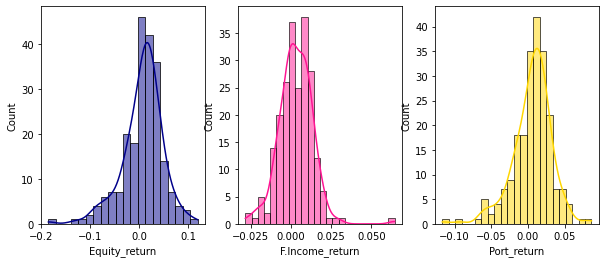

In [90]:
#Monthly return distribution

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10,4))


sns.histplot(ax=axs[0], x=df_return1['Equity_return'], kde=True, color = 'darkblue')

sns.histplot(ax=axs[1], x= df_return1['F.Income_return'], kde=True, color = 'deeppink')

sns.histplot(ax=axs[2], x = df_return1['Port_return'], kde=True, color = 'gold')

In [91]:
#Compare their staitical properties

print('Statistical properties of S&P 500 returns')
print(df_return1[['Equity_return']].describe(), '\n')

print('Statistical properties of AGG returns')
print(df_return1['F.Income_return'].describe(), '\n')

print('Statistical properties of 60/40 portfolio')
print(df_return1['Port_return'].describe())

Statistical properties of S&P 500 returns
       Equity_return
count     220.000000
mean        0.006871
std         0.041663
min        -0.185636
25%        -0.015133
50%         0.012126
75%         0.031131
max         0.119421 

Statistical properties of AGG returns
count    220.000000
mean       0.003017
std        0.010473
min       -0.028467
25%       -0.002510
50%        0.002675
75%        0.009437
max        0.064499
Name: F.Income_return, dtype: float64 

Statistical properties of 60/40 portfolio
count    220.000000
mean       0.005691
std        0.026564
min       -0.116926
25%       -0.006024
50%        0.009408
75%        0.021549
max        0.086573
Name: Port_return, dtype: float64


In [92]:
#Compare the kurtosis

print('Peakedness of equity returns distribution is: ',kurtosis(df_return1['Equity_return']),'\n')
print('Peakedness of fixed income returns distribution is: ',kurtosis(df_return1['F.Income_return']), '\n')
print('Peakedness of 60/40 portfolio returns distribution is: ',kurtosis(df_return1['Port_return']))

Peakedness of equity returns distribution is:  2.450143788569484 

Peakedness of fixed income returns distribution is:  4.92580902103566 

Peakedness of 60/40 portfolio returns distribution is:  2.720527259479943


In [93]:
#Compare the skewness

print('The skewness of the equity returns distribution is: ', skew(df_return1['Equity_return']),'\n')
print('The skewness of the fixed income returns distribution is: ', skew(df_return1['F.Income_return']),'\n')
print('The skewness of the portfolio return distribution is: ', skew(df_return1['Port_return']))

The skewness of the equity returns distribution is:  -0.9006022294010575 

The skewness of the fixed income returns distribution is:  0.6177815112476813 

The skewness of the portfolio return distribution is:  -0.8769893395195771


/Users/user/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
/Users/user/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
/Users/user/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


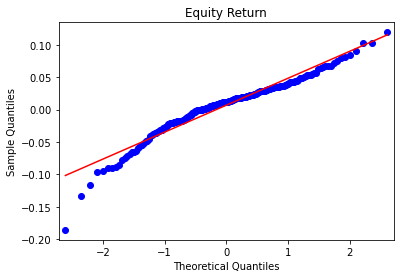

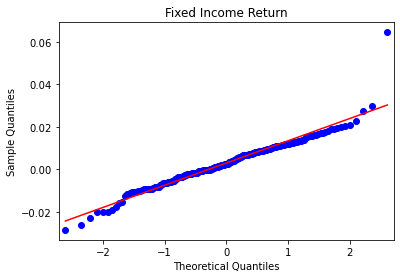

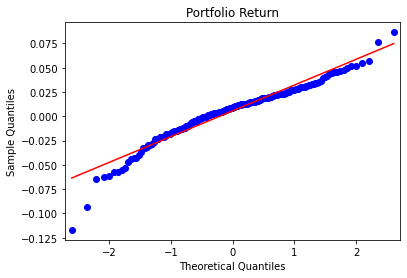

In [94]:
from statsmodels.graphics.gofplots import qqplot
qqplot(df_return1['Equity_return'], line = 's')
plt.title('Equity Return')

qqplot(df_return1['F.Income_return'], line = 's')
plt.title('Fixed Income Return')

qqplot(df_return1['Port_return'], line = 's')
plt.title('Portfolio Return')

plt.show()

## Step 5

In [95]:
#write a drawdown function

def drawdown(price_series: pd.Series):
    """Receives a time series of asset prices/,
       returns a DataFrame with columns for
       the wealth index, 
       the previous peaks, and 
       the percentage drawdown
    """
    wealth_index = price_series
    prev_peaks = wealth_index.cummax()
    pct_drawdown = (wealth_index - prev_peaks)/prev_peaks
    return pd.DataFrame({
        'Wealth':wealth_index,
        'Peaks':prev_peaks,
        'Drawdown':pct_drawdown
    })

In [96]:
#Compute the max drawdown (MDD) for each of the three portfolios

DD_Equity = drawdown(monthly_data['Equity'])['Drawdown']
MDD_Equity = drawdown(monthly_data['Equity'])['Drawdown'].min()

DD_FIncome = drawdown(monthly_data['F.Income'])['Drawdown']
MDD_FIncome = drawdown(monthly_data['F.Income'])['Drawdown'].min()

DD_Portfolio = drawdown(monthly_data['Port'])['Drawdown']
MDD_Portfolio = drawdown(monthly_data['Port'])['Drawdown'].min()

Date_MDD_Equity = DD_Equity.idxmin()
Date_MDD_FIncome = DD_FIncome.idxmin()
Date_MDD_Portfolio = DD_Portfolio.idxmin()

print('The Max drawdown for Equity was: ', str(round(MDD_Equity*100,2))+'%', 'and it occured in ', Date_MDD_Equity, '\n')
print('The Max drawdown for Fixed Income was: ', str(round(MDD_FIncome*100,2))+'%', 'and it occured in ', Date_MDD_FIncome, '\n')
print('The Max drawdown for the portfolio was: ', str(round(MDD_Portfolio*100,2))+'%', 'and it occured in ', Date_MDD_Portfolio)

The Max drawdown for Equity was:  -52.56% and it occured in  2009-02-28 00:00:00 

The Max drawdown for Fixed Income was:  -4.31% and it occured in  2008-10-31 00:00:00 

The Max drawdown for the portfolio was:  -32.95% and it occured in  2009-02-28 00:00:00


In [97]:
#Calculate Recovery time

#What was the peak before the valley (the valley dates are printed above)?
Equity_peak = drawdown(monthly_data['Equity'])['Peaks'].loc[:str(Date_MDD_Equity)].max()
FI_peak = drawdown(monthly_data['F.Income'])['Peaks'].loc[:str(Date_MDD_FIncome)].max()
Port_peak = drawdown(monthly_data['Port'])['Peaks'].loc[:str(Date_MDD_Portfolio)].max()

In [98]:
#The Wealth index, peaks and Drawdown (WPD) for each of the assets and overall portfolio
Equity_wpd = drawdown(monthly_data['Equity'])
FI_wpd = drawdown(monthly_data['F.Income'])
Port_wpd = drawdown(monthly_data['Port'])

#Equity peak date
Equity_peak_date = Equity_wpd[Equity_wpd['Peaks'] == Equity_peak].index.values.min()
FI_peak_date = FI_wpd[FI_wpd['Peaks'] == FI_peak].index.values.min()
Port_peak_date = Port_wpd[Port_wpd['Peaks'] == Port_peak].index.values.min()

#Recovery date
Equity_recovery_date = Equity_wpd[Equity_wpd['Peaks'] == Equity_peak].index.values.max()
FI_recovery_date = FI_wpd[FI_wpd['Peaks'] == FI_peak].index.values.max()
Port_recovery_date = Port_wpd[Port_wpd['Peaks'] == Port_peak].index.values.max()


print('Equity recovery date: ', Equity_recovery_date)
print('Equity peak date: ', Equity_peak_date, '\n')
print('F.Income recovery date: ', FI_recovery_date)
print('F.Income peak date: ', FI_peak_date, '\n')
print('Portfolio recovery date: ', Port_recovery_date)
print('Portfolio peak date: ', Port_peak_date)

Equity recovery date:  2013-02-28T00:00:00.000000000
Equity peak date:  2007-10-31T00:00:00.000000000 

F.Income recovery date:  2008-11-30T00:00:00.000000000
F.Income peak date:  2008-04-30T00:00:00.000000000 

Portfolio recovery date:  2012-01-31T00:00:00.000000000
Portfolio peak date:  2007-10-31T00:00:00.000000000


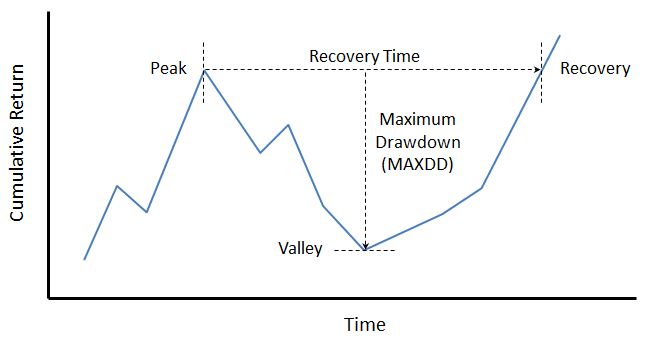



Source: https://www.mutualfundobserver.com/2014/08/recovery-time/ 

In [99]:
#As depicted in the chart above, recovery period = recovery date - peak date

In [100]:
#Given the dates printed above, find the difference in time period
Equity_recovery_time = (np.datetime64(str(Equity_recovery_date)) - np.datetime64(str(Equity_peak_date)))
FI_recovery_time = (np.datetime64(str(FI_recovery_date)) - np.datetime64(str(FI_peak_date)))
Port_recovery_time = (np.datetime64(str(Port_recovery_date)) - np.datetime64(str(Port_peak_date)))


#Convert the number of days to years, assuming 252 trading days per year
print('Recovery time for equity is: ', round(Equity_recovery_time/np.timedelta64(252, 'D'),1),'years', '\n')
print('Recovery time for F.Income is: ', round(FI_recovery_time/np.timedelta64(252, 'D'),1),'years', '\n')
print('Recovery time for the portfolio is: ', round(Port_recovery_time/np.timedelta64(252, 'D'),1),'years')

Recovery time for equity is:  7.7 years 

Recovery time for F.Income is:  0.8 years 

Recovery time for the portfolio is:  6.2 years


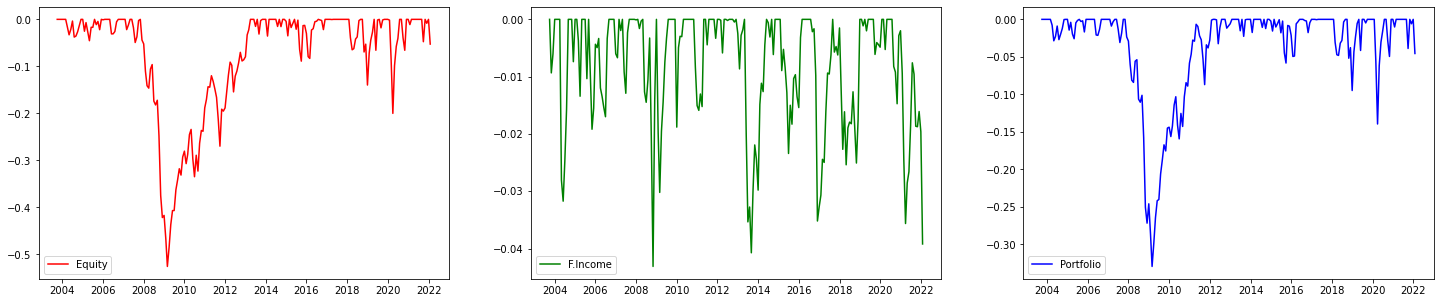

In [101]:
#Plot the drawdown
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(25,5))

#sns.histplot(ax=axs[0], x=df_return1['Equity_return'], kde=True, color = 'darkblue')


ax1.plot(drawdown(monthly_data['Equity'])[['Drawdown']], label = 'Equity', color = 'red')
ax2.plot(drawdown(monthly_data['F.Income'])[['Drawdown']], label = 'F.Income', color = 'green')
ax3.plot(drawdown(monthly_data['Port'])[['Drawdown']], label = 'Portfolio', color = 'blue')

ax1.legend()
ax2.legend()
ax3.legend()




<AxesSubplot:xlabel='Date'>

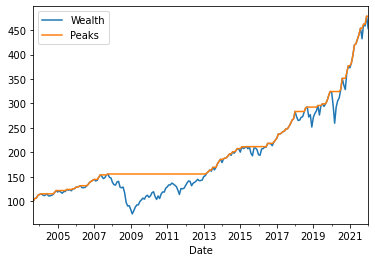

In [102]:
#Plot the wealth index against the peaks

drawdown(monthly_data['Equity'])[['Wealth', 'Peaks']].plot()



## Step 6

In [103]:
#If the portfolio was untouched (not rebalanced)

monthly_data2 = monthly_data.copy()

Portfolio2 = []

for a in range(len(monthly_data2['Port'])):
    a = monthly_data2['Equity'].iloc[a]+(monthly_data2['F.Income'].iloc[a])
    sum_port = monthly_data2['Equity'].iloc[0]+(monthly_data2['F.Income'].iloc[0])
    Portfolio2.append((a/sum_port)*100)

monthly_data2['Port'] = Portfolio2



In [104]:
monthly_data2

,Equity,F.Income,Port
Date,,,
2003-09-30,100.000000,100.000000,100.000000
2003-10-31,105.496149,99.065240,102.280695
2003-11-30,106.248180,99.396533,102.822357
2003-12-31,111.641917,100.369870,106.005894
2004-01-31,113.570690,100.812002,107.191346
...,...,...,...
2021-09-30,432.496963,198.369814,315.433388
2021-10-31,462.401478,198.352506,330.376992
2021-11-30,458.547948,198.889729,328.718839


In [105]:
#Compute the monthly return

df_return2 = pd.DataFrame()

for q in monthly_data2.columns[0:]:
    new_stock2 = list(monthly_data2[q])
    ret_stock2 = [0]*(len(new_stock2)-1)
    for b in range(len(ret_stock2)):
        ret_stock2[b] = np.log(new_stock2[b+1]/new_stock2[b])
        df_return2[q+'_return'] = ret_stock2

df_return2.head()

,Equity_return,F.Income_return,Port_return
0,0.053504,-0.009392,0.022551
1,0.007103,0.003339,0.005282
2,0.049519,0.009745,0.030492
3,0.017129,0.004395,0.011121
4,0.012135,0.011350,0.011766


In [106]:
#Put the relevant dates as the index
df_return2.index = monthly_data2.index[1:221]

df_return2.head()

,Equity_return,F.Income_return,Port_return
Date,,,
2003-10-31,0.053504,-0.009392,0.022551
2003-11-30,0.007103,0.003339,0.005282
2003-12-31,0.049519,0.009745,0.030492
2004-01-31,0.017129,0.004395,0.011121
2004-02-29,0.012135,0.011350,0.011766


Volatility of both portfolio:  
Untouched Portfolio:  0.022849867233194366 
Rebalanced Portfolio:  0.026503520386058074 



[Text(0.5, 1.0, 'Distribution of rebalanced portfolio')]

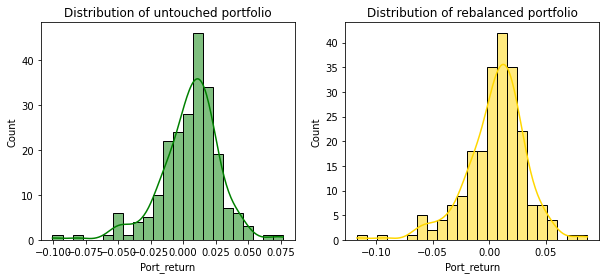

In [107]:
#Annualized return for untouched portfolio

#Volatility of untouched portfolio
sum_port_ret2 = sum(df_return2['Port_return'])
len_port_ret2 = len(df_return2['Port_return'])
mean_port_ret2 = sum_port_ret2/len_port_ret2



port_var2 = sum([((d-mean_port_ret2)**2) for d in df_return2['Port_return']]) /len_port_ret2
port_stdev2 = port_var2**0.5


print('Volatility of both portfolio: ', '\n'
      'Untouched Portfolio: ', port_stdev2, '\n'
     'Rebalanced Portfolio: ', port_stdev, '\n')

#Plot the distribution of both portfolios
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

sns.histplot(ax = axs[0], x = df_return2['Port_return'], kde=True, color = 'green').set(title = 'Distribution of untouched portfolio')

sns.histplot(ax = axs[1], x = df_return1['Port_return'], kde=True, color = 'gold').set(title = 'Distribution of rebalanced portfolio')

In [108]:
#find the peakedness of both distribution

from scipy.stats import kurtosis

print(kurtosis(df_return1['Port_return']))
print(kurtosis(df_return2['Port_return']))

2.720527259479943
2.861772849102393


/Users/user/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


Text(0.5, 1.0, 'Untouched Portfolio Return')

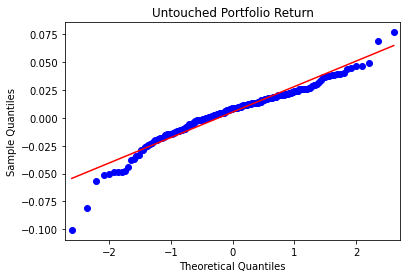

In [109]:
#Plot qq plot

qqplot(df_return2['Port_return'], line = 's')
plt.title('Untouched Portfolio Return')

<AxesSubplot:xlabel='Date'>

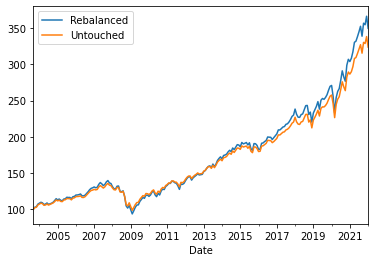

In [110]:
#Plot the wealth index of both rebalanced and untouched portfolios

new_df_returns = pd.DataFrame()

new_df_returns['Rebalanced'] = drawdown(monthly_data['Port'])[['Wealth']]
new_df_returns['Untouched'] = drawdown(monthly_data2['Port'])[['Wealth']]

new_df_returns.plot()

# Summary and Key findings

The analysis started with importation of the required packages and data, thereafter, some necessary pre-processing was done to make it appropriate for analysis e.g. checking for NaN values, reformatting the date column to datetime format and indexing it. 

Next was to rebase the prices of equity, fixed income and the portfolio to $100, as that is the assumed amount invested. Based on the result, the monthly log returns were computed, and the sample was subsequently divided into halves. The first half gave an annualized mean return of 4.26%, which was lower than the second half of 9.39% and the entire sample mean return of 6.83%. However, compared to the second half and entire sample, the first half sample returns showed a strong correlation of 0.07, versus 0.03 and 0.05 of the second-half and full sample

Furthermore, the distributions of returns of the equity, fixed income and portfolio returns appeared relatively normal, however, the equity returns distribution seemed more normally distributed. Regardless, it is negatively skewed and moderately peaked at -0.9 and 2.45 respectively, compared with the positively skewed but highly peaked fixed income return at 0.6 and 4.93 respectively. Expectedly, equities also had a higher volatility based on a standard deviation of 0.04, compared with 0.01 of fixed income. The portfolio had a volatility of 0.02

To compute the drawdown, a function was defined, and the result revealed a max drawdown of 52.56%, 4.31% and 32.95% for the equity, fixed income, and overall portfolio. These drawdowns were between 2008 and 2009, highlighting the impact of the historic 2008-2009 global financial crisis. While the fixed income investment recovered in less than a year, it took 7.7 years before equity prices bounced back to its historical high. The recovery time for the overall portfolio was 6.2 years. 

To conclude the exercise, the 60/40 rebalanced portfolio was compared with one that was not rebalanced (untouched portfolio). Interestingly, the untouched portfolio had a slightly lower volatility of 0.022 vs 0.027 for the rebalanced. Also, the untouched portfolio seemed more peaked, with a kurtosis of 2.86 vs 2.72 of the rebalanced. Finally, when the price index of both portfolios are plotted, the trend seems largely in line, until about 2018, when a marginal deviation is observed between both portfolios. The rebalanced portfolio trended higher, highlighting diversification benefits. 
